In [ ]:
%matplotlib inline

import numpy as np # grey images are stored in memory as 2D arrays, color images as 3D arrays
import cv2 as cv2 # opencv computer vision library
from skimage import io # for io.imread
from matplotlib import pyplot as plt # ploting
from matplotlib import colors # ploting

import os

# interactive notebook widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import copy
import random

import tqdm

In [ ]:
cam=cv2.VideoCapture('IMG_9190.mp4')

## 1) Lecture d'une vidéo et découpage de ses différentes images : 

In [ ]:
try:  
    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')
  # if not created then raise error
except OSError:
    print ('Error: Creating directory of data')

currentframe = 0 #frame
video=[]
  
while(True):   
    # reading from frame
    ret,frame = cam.read() 
    #ret gets true if another image after, false if last image
    #frame is the corresponding image
    video.append(frame)
    
    if ret:
        # if video is still left continue creating images
        name = './data/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
  # Release all space and windows once done
cam.release()
cv2.destroyAllWindows()
video=np.array(video)

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg
Creating..../data/frame9.jpg
Creating..../data/frame10.jpg
Creating..../data/frame11.jpg
Creating..../data/frame12.jpg
Creating..../data/frame13.jpg
Creating..../data/frame14.jpg
Creating..../data/frame15.jpg
Creating..../data/frame16.jpg
Creating..../data/frame17.jpg
Creating..../data/frame18.jpg
Creating..../data/frame19.jpg
Creating..../data/frame20.jpg
Creating..../data/frame21.jpg
Creating..../data/frame22.jpg
Creating..../data/frame23.jpg
Creating..../data/frame24.jpg
Creating..../data/frame25.jpg
Creating..../data/frame26.jpg
Creating..../data/frame27.jpg
Creating..../data/frame28.jpg
Creating..../data/frame29.jpg
Creating..../data/frame30.jpg
Creating..../data/frame31.jpg
Creating..../data/frame32.jpg
Creating..../data/fr

/Users/mathieu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


### Change of images channel 

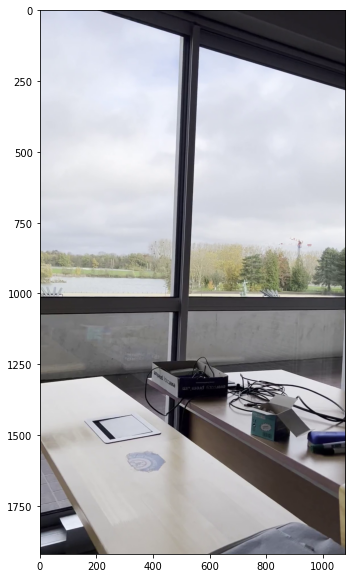

In [ ]:
img=copy.deepcopy(video[1])

#they interchanged R and B so:

out=np.zeros(video[0].shape)

out[:,:,0]=copy.deepcopy(img[:,:,2]) #--->Here
out[:,:,1]=copy.deepcopy(img[:,:,1])
out[:,:,2]=copy.deepcopy(img[:,:,0]) #--->Here
out=out.astype(int) #IMPORTANT

'''Trying to show one frame of the video'''
plt.figure(figsize=(10,10))
plt.imshow(out)

#need to do it on all the images of the video

# Our own growing region algo (later maybe)

In [ ]:
#find a "green enough" spot

img=video[50] #we select one image 
i,j=0,0
g_point=img[i,j,:]
print(g_point, i, j)
while (g_point[1]<100) or (g_point[0]>100) or (g_point[2]>100): #need a better selection criteria! 
#(check the color of the green blanket we will use)

    i=random.randint(0, img.shape[0]-1)
    j=random.randint(0, img.shape[1]-1)
    g_point=img[i,j,:]
    
print(g_point, i, j)

[102 114 124] 0 0
[ 95 104  92] 990 373


In [ ]:
#growing region
#i,j point of interest (which starts the growing region)
#T the threshold

def GR(img, i, j, T):
    
    (I,J,colors)=(img.shape)
    new_region=[[i,j]]
    treated_region=[]
    total_region=[[i,j]]
    
    mu_R, mu_G, mu_B=img[i,j,0], img[i,j,1], img[i,j,2]
    neighb=[-1,0,1]
    
    while new_region!=[]:
        #print("new", new_region)
        #print("treated", treated_region)
        #print("total", total_region)
        print(len(total_region)/(I*J))
 
        #everytime reevaluate mu of total_R
        mu_R, mu_G, mu_B=0,0,0
        for k in range(len(total_region)):
            pt=total_region[k]
            mu_R+=img[pt[0], pt[1], 0]
            mu_G+=img[pt[0], pt[1], 1]
            mu_B+=img[pt[0], pt[1], 2]
        mu_R/=len(total_region)
        mu_G/=len(total_region)
        mu_B/=len(total_region)
        
        #can also compute sigma (if we decide to use it for the thresholding criteria)
        
        R=copy.deepcopy(new_region)
        for pt in R: #treat all the points newly added to the region
            i,j=pt[0], pt[1]
            for add_i in neighb:
                for add_j in neighb:
                    newi=i+add_i
                    newj=j+add_j
                    if newi!=i or newj!=j:
                        if (newi>=0) and (newj>=0) and (newi<I) and (newj<J) and ([newi, newj] not in total_region):
                            if np.abs(img[newi,newj,0]-mu_R)<T and np.abs(img[newi,newj,1]-mu_G)<T and np.abs(img[newi,newj,2]-mu_B)<T:
                                new_region.append([newi,newj])
                                total_region.append([newi, newj])

            treated_region.append(pt)
            new_region.remove(pt)
            #print(treated_region)
            
    return treated_region

In [ ]:
test2=np.zeros((5,5,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


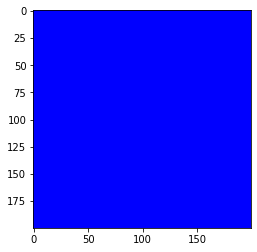

In [ ]:
matrix_test=np.zeros((200,200,3))
for i in range(200):
    for j in range(200):
        for k in range(3):
            if k==2:
                matrix_test[i,j,k]=100
                
plt.imshow(matrix_test)

In [ ]:
new_region=GR(out, 1750,400 , 10)
new_region

4.822530864197531e-07
4.340277777777778e-06
1.2056327160493826e-05
2.36304012345679e-05
3.90625e-05
5.835262345679012e-05
8.150077160493827e-05
0.00010850694444444444
0.00013937114197530863
0.00017409336419753086
0.0002126736111111111
0.0002551118827160494
0.00030140817901234566
0.0003515625
0.00040557484567901235
0.0004634452160493827
0.0005251736111111111
0.0005907600308641976
0.000660204475308642
0.0007335069444444444
0.0008106674382716049
0.0008916859567901235
0.0009765625
0.0010652970679012345
0.0011578896604938272
0.0012543402777777778
0.0013546489197530864
0.001458815586419753
0.0015668402777777777
0.0016787229938271604
0.0017944637345679011
0.0019140625
0.0020375192901234567
0.0021619405864197533
0.0022882908950617284
0.0024170524691358025
0.002548225308641975
0.0026822916666666666
0.002813946759259259
0.0029484953703703704
0.0030864197530864196
0.0032262731481481483
0.0033685378086419754
0.003513213734567901
0.003660300925925926
0.0038112461419753086
0.003962191358024691
0.004

KeyboardInterrupt: 

In [ ]:
def remover(image,R):
    img=copy.deepcopy(image)
    for pt in range(len(R)):
        for color in range(3):
            img[R[pt][0], R[pt][1], color]=0
    return img

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(remover(matrix_test, new_region))

## 2) Using libraries

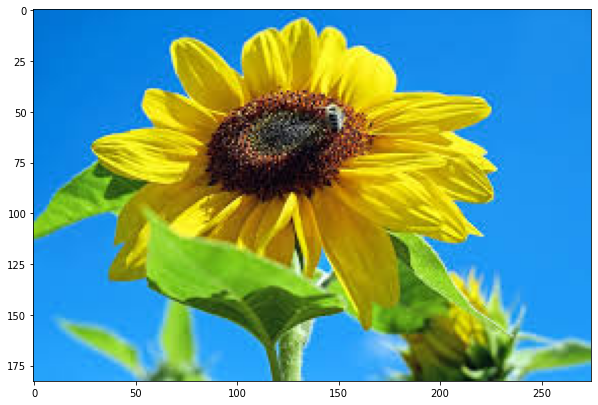

In [ ]:
img=cv2.imread('Plante.jpg')

#they interchanged R and B so:

fleur=np.zeros(img.shape)

fleur[:,:,0]=copy.deepcopy(img[:,:,2]) #--->Here
fleur[:,:,1]=copy.deepcopy(img[:,:,1])
fleur[:,:,2]=copy.deepcopy(img[:,:,0]) #--->Here
fleur=fleur.astype(int) #IMPORTANT

'''Trying to show one frame of the video'''
plt.figure(figsize=(10,10))
plt.imshow(fleur)

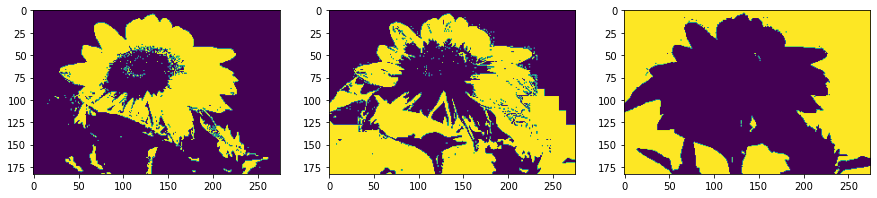

In [ ]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
 
# Sample Image of scikit-image package
img_R=fleur[:,:,0]
img_G=fleur[:,:,1]
img_B=fleur[:,:,2]

segm_R=(img_R > 150)*1
segm_G=(img_G > 150)*1
segm_B=(img_B > 200)*1 #above threshold ==> 1 and below threshold ==> 0

fig=plt.figure(figsize=(15, 15))
rows=1
columns=3

fig.add_subplot(rows, columns, 1)
plt.imshow(segm_R)
fig.add_subplot(rows, columns, 2)
plt.imshow(segm_G)
fig.add_subplot(rows, columns, 3)
plt.imshow(segm_B)


In [ ]:
'''
cam=cv2.VideoCapture(1)
window="webcam"
Width= int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
Height=int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))
cv2.namedWindow(window,cv2.WND_PROP_FULLSCREEN)

while cam.isOpened(): 
    
    ret,img=cam.read()
    if ret: 
        cv2.imshow(window,img)
        #il faut introduire la fonction ici 
        if cv2.waitKey(25) & 0xFF==ord('q'): 
            break   
'''

Récap : ce qu'on a fait 
- On est capable de trouver la zone verte dans l'image.
- On doit dire :"fais disparaitre cette zone verte et reconstruit le background de l'image" en lui donnant une image avec une personne entouré de la cape. 
- Algorithme Gan : on va utiliser le vanilla Gan, qui est le modèle de base et qui marche plutot bien. 

On va donner au discriminateur des images réèls ( banque d'image crée )
et au générateur on va lui donner nos images "troué" pour qu'ils essaient de les reconstruire

https://debuggercafe.com/vanilla-gan-pytorch/

In [ ]:
#pip install torchvision

Pour le moment, le dataset est encore faible,
il faut écrire une fonction de scrapping pour aller chercher les images
de google -> 
Gros bug pour le scrapping, c'est super dur

In [ ]:
#Step 1: Importer le data set et le transformer en RGB 
from os import listdir

In [ ]:
def load_images(directory,n): 
    images=[]
    i=0
    #print(directory)
    for file in listdir(directory):
        filename=directory+"/"+file
        #print(filename)
        image=cv2.imread(filename) #We read every images on the folder
        #plt.imshow(image)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #We transform it into BGR to RGB
        #plt.imshow(image)
        image=np.asarray(image) #convert the input to an array
        images.append(image)
        i+=1
        if i>n: 
            break 
    return np.asarray(images,dtype=object)

In [ ]:
# n is the number of images that i want to take in the dataset
images=load_images("Google_Scrapping",50)
print(images.shape)

(51,)


<function matplotlib.pyplot.show(close=None, block=None)>

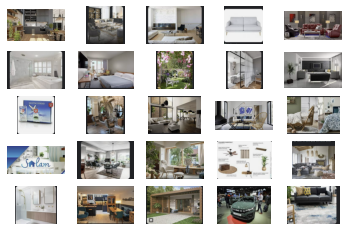

In [ ]:
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.axis('off')
    plt.imshow(images[i])
plt.show

Une fois qu'on a importer le dataset et qu'on l'a transforme en RGB, il faut construire le modèle GAN. 
- Construire le discriminateur qui est lui même un reseau de neurone 
- Construire le générateur

In [ ]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import math

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


https://github.com/christianversloot/machine-learning-articles/blob/main/building-a-simple-vanilla-gan-with-pytorch.md

### Configuration of variables 

- The number of epochs: each training process contains a fixed number of iterations through the entire training set, the number of epochs.

- The noise dimension: recall that the Generator will be fed a variable that serves as a sample from a multidimensional latent distribution. These are difficult words to say that we sample from a landscape that will eventually take a shape so that good examples are produced by the Generator. The dimensionality of this landscape and hence the vectors sampled from it will be defined by NOISE_DIMENSION.

- The batch size: within an epoch, we feed forward the data through the network in batches - i.e., not all in once. The why is simple - because it would not fit in memory otherwise. We set the batch size to 128 samples, but this can be higher, depending on the hardware on your system.

- Training on GPU, yes or no: depending on the availability of a GPU, you can choose to use it for training - otherwise your CUP will be used.

- A unique run identifier: related to housekeeping. You will see that during the training process, intermediate models and images will be stored on disk so that you can keep track of training progress. A folder with a unique identifier will be created for this purpose; hence the UNIQUE_RUN_ID.

- Print stats after n-th batch: after feeding forward minibatches through the network, statistics will be printed after every n-th batch. Currently, we set it to 50.

- The optimizer learning rate and optimizer betas. The optimizer for the Generator and Discriminator will be initialized with a learning rate and Beta values. We set them to values that are deemed to produce acceptable results given previous research.

- The output shape of the generator output will be used to initialize the last layer of the Generator and the first layer of the Discriminator. It must be a multiplication of all shape dimensions of an individual image. In the exemple case, the MNIST dataset has 28x28x1 images.

In [ ]:
torch.cuda.is_available()

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Root directory for dataset

dataroot = "/content/drive/MyDrive/DATASET_VISION/Google_Scrapping"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 100

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [ ]:
# n is the number of images that i want to take in the dataset
images=load_images(dataroot,50)
print(images.shape)

(51,)


In [ ]:
images[0].shape

(167, 302, 3)

<function matplotlib.pyplot.show(*args, **kw)>

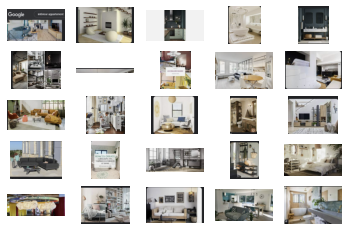

In [ ]:
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.axis('off')
    plt.imshow(images[i])
plt.show

In [ ]:
#Redimension the images
new_data=[]
for image in images:
  (I,J,K)=image.shape
  if I>64:
    if J>64:
      mid_I=math.floor(I/2)
      mid_J=math.floor(J/2)
      new_data.append(image[mid_I-32:mid_I+32, mid_J-32:mid_J+32, :])
      

<function matplotlib.pyplot.show(*args, **kw)>

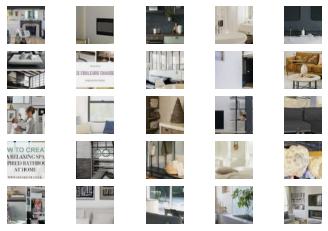

In [ ]:
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.axis('off')
    plt.imshow(new_data[i])
plt.show

# **Documentation**

torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1, padding_mode='zeros', device=None, dtype=None)


In [ ]:
device = "cuda:0"
dataloader = torch.utils.data.DataLoader(new_data, batch_size=batch_size, shuffle=True, num_workers=workers)

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:
# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64
# Size of z latent vector (i.e. size of generator input)
nz = 100 
# Size of feature maps in generator (number of "colors")
ngf=64
# Number of channels in the training images. For color images this is 3
nc = 3

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            
            # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf*8, 4, 1, 0, bias=False),
            #in_channels=the number of theoretical colors (aka K in (I,J,K) shape of the image)
            #Thus the layer always first takes a 1*1 images and you vary this K
            nn.BatchNorm2d(ngf*8),
            nn.ReLU(True),

            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf*8, ngf*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*4),
            nn.ReLU(True),

            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),

            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
netG = Generator(ngpu).to(device)
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.02.
netG.apply(weights_init)
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [ ]:
# Size of feature maps in discriminator
ndf = 64

class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
netD = Discriminator(ngpu).to(device)
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [ ]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [ ]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):
        print(data.shape)
        data = data.transpose(1,3)

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data.to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        print(real_cpu.float().shape)
        output = netD(real_cpu.float()).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
torch.Size([49, 64, 64, 3])
torch.Size([49, 3, 64, 64])
[0/5][0/1]	Loss_D: 1.9664	Loss_G: 5.3910	D(x): 0.4866	D(G(z)): 0.6060 / 0.0059
torch.Size([49, 64, 64, 3])
torch.Size([49, 3, 64, 64])
[1/5][0/1]	Loss_D: 0.8250	Loss_G: 6.8348	D(x): 0.9667	D(G(z)): 0.4783 / 0.0015
torch.Size([49, 64, 64, 3])
torch.Size([49, 3, 64, 64])
[2/5][0/1]	Loss_D: 0.2418	Loss_G: 6.9142	D(x): 0.9595	D(G(z)): 0.1680 / 0.0014
torch.Size([49, 64, 64, 3])
torch.Size([49, 3, 64, 64])
[3/5][0/1]	Loss_D: 0.1613	Loss_G: 6.4405	D(x): 0.9586	D(G(z)): 0.1054 / 0.0022
torch.Size([49, 64, 64, 3])
torch.Size([49, 3, 64, 64])
[4/5][0/1]	Loss_D: 0.2771	Loss_G: 7.1763	D(x): 0.9620	D(G(z)): 0.1945 / 0.0011


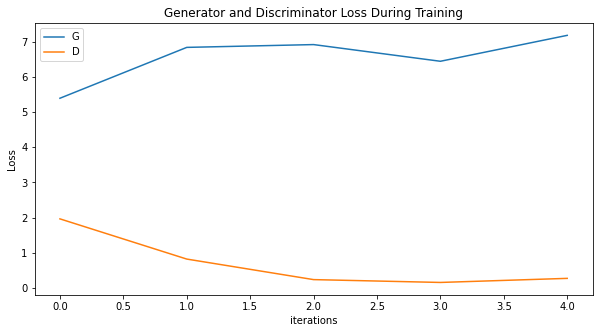

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

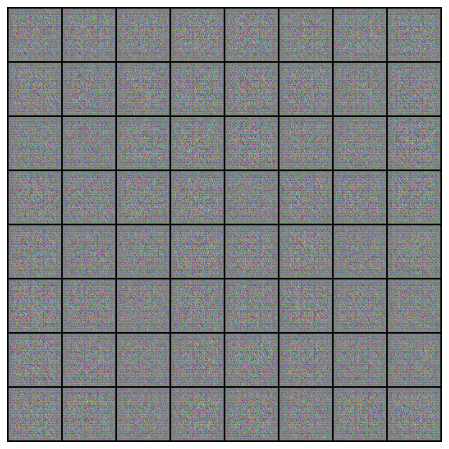

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())